In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast #abstract syntax grammar 
from collections import Counter
from wordcloud import WordCloud

In [16]:
movies = pd.read_csv('Dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('Dataset/tmdb_5000_credits.csv')

In [17]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [18]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [19]:
print("Shape of movies dataset:",movies.shape)
print("Shape of credits dataset:",credits.shape)

Shape of movies dataset: (4803, 20)
Shape of credits dataset: (4803, 4)


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


## Q1: Combine the two datsets as one dataframe

In [13]:
combined_df = pd.merge(movies, credits)
combined_df.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Q2: Remove the following columns:
- 'homepage','tagline','id','overview','status','original_title','movie_id'.

In [21]:
combined_df.drop(['homepage', 'tagline', 'id', 'overview', 'status', 'original_title', 'movie_id'], axis=1, inplace=True)


In [24]:
#movies.head(3)
combined_df.head(3)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Q3: Create Genres dataframe that hase two coulumns Genres and Frequency
- Hint: Use Counter to calculate Frequency
- Add new catagory to Genres called Others when the Frequency < 200

In [238]:
genres_list = []

# Iterate over the rows of the DataFrame
for index, row in combined_df.iterrows():
    # print(index,'  ',row)
    # Extract the 'genres' value as a string
    genres_str = row['genres']
    # print(genres_str)
    # Convert the string to a list of dictionaries using ast.literal_eval()
    genre_list = ast.literal_eval(genres_str)
    # print(genre_list)
# #     # Extract the genre names using a list comprehension
    genre_names = [genre['name'] for genre in genre_list]
    # print(genre_names)

    
    genres_list.append(genre_names)
# print(genres_list)

for genres in genres_list:   
    # print(genres)                ###this is basically what is happening in the list below 
    for g in genres:
        # pass
        print(g)

genres_counter = Counter([g for genres in genres_list for g in genres]) # 
# print(genres_counter)
Genres = []
Frequency=[]
for keys ,value in genres_counter.items():
    Genres.append(keys)
    Frequency.append(value)
GF_df=pd.DataFrame({
    'Genres':Genres,
    'Frequency':Frequency
})
GFF_df = GF_df.copy()
GF_df.loc[GF_df['Frequency'] < 200, 'Genres'] = 'Other'
GF_df 

Action
Adventure
Fantasy
Science Fiction
Adventure
Fantasy
Action
Action
Adventure
Crime
Action
Crime
Drama
Thriller
Action
Adventure
Science Fiction
Fantasy
Action
Adventure
Animation
Family
Action
Adventure
Science Fiction
Adventure
Fantasy
Family
Action
Adventure
Fantasy
Adventure
Fantasy
Action
Science Fiction
Adventure
Action
Thriller
Crime
Adventure
Fantasy
Action
Action
Adventure
Western
Action
Adventure
Fantasy
Science Fiction
Adventure
Family
Fantasy
Science Fiction
Action
Adventure
Adventure
Action
Fantasy
Action
Comedy
Science Fiction
Action
Adventure
Fantasy
Action
Adventure
Fantasy
Action
Adventure
Adventure
Fantasy
Adventure
Fantasy
Adventure
Drama
Action
Drama
Romance
Thriller
Adventure
Action
Science Fiction
Thriller
Action
Adventure
Science Fiction
Action
Adventure
Science Fiction
Thriller
Action
Adventure
Thriller
Action
Adventure
Fantasy
Action
Adventure
Science Fiction
Family
Fantasy
Adventure
Adventure
Action
Science Fiction
Thriller
Animation
Family
Science Fictio

,Genres,Frequency
0,Action,1156
1,Adventure,792
2,Fantasy,425
3,Science Fiction,538
4,Crime,697
5,Drama,2300
6,Thriller,1275
7,Animation,234
8,Family,514
9,Other,82


## Q4: Use bar chart draws the relationship between genres of movies and Frequency.
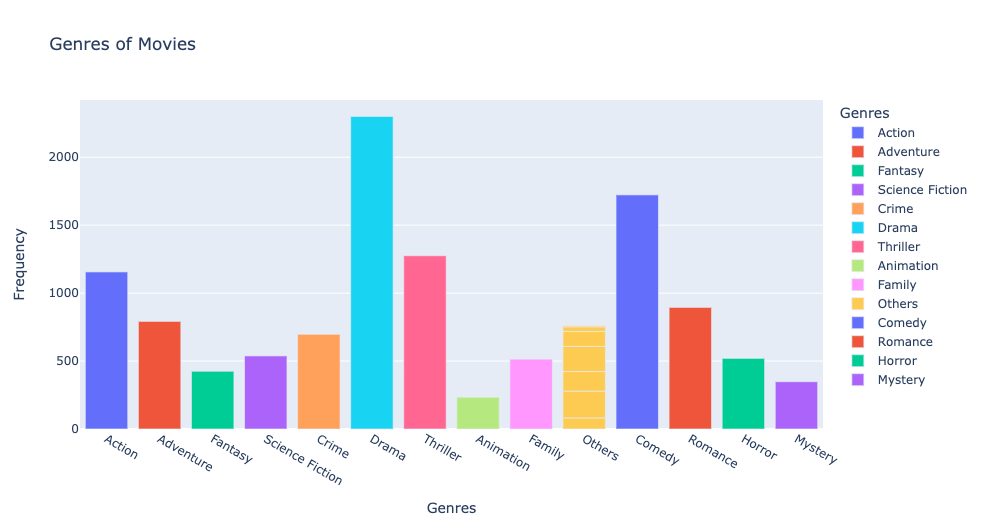

In [193]:
fig = px.bar(GF_df, x='Genres', y='Frequency',color='Genres', title='Genres of Movies and Frequency')
fig.show()

In [201]:
#wrong
# countries_list2 = []
# languages_list=[]
# Frequency_list=[]
# # Extract country names from 'production_countries' column
# for row in combined_df['production_countries']:
#     countries = ast.literal_eval(row)
#     for country in countries:
#         countries_list2.append(country['name'])
# # print(countries_list2)
# countries_list3 = Counter([g for l in countries_list2 for g in l])
# # print(countries_list3.values())
# for languages,Freq in countries_list3.items():
#     languages_list.append(languages)
#     Frequency_list.append(Freq)
# lll=pd.DataFrame({
#     'L':languages_list,
#     'F':Frequency_list
# })
# kkkk=lll.sort_values('F',ascending=False).head()
# kkkk
# px.pie(kkkk, values='F', names='L', title='Top 5 Languages')


## Q5: Use pie chart to draw top 5 languages.
- Hint: use counter to create dataframe contains production_countries with Frequencies.
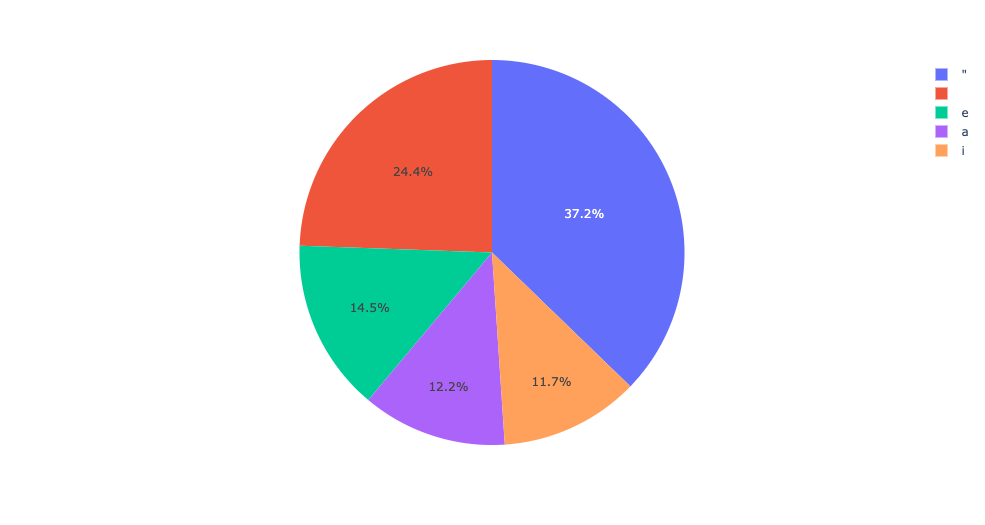

In [212]:
genres_list = []

# Iterate over the rows of the DataFrame
for index, row in combined_df.iterrows():
    # print(index,'  ',row)
    # Extract the 'genres' value as a string
    genres_str = row['production_countries']
    # print(genres_str)
    # Convert the string to a list of dictionaries using ast.literal_eval()
    genre_list = ast.literal_eval(genres_str)
    # print(genre_list)
    # Extract the genre names using a list comprehension
    genre_names = [genre['iso_3166_1'] for genre in genre_list]

    
    genres_list.append(genre_names)


# for genres in genres_list:           ###this is basically what is happening in the list below 
#     for g in genres:
#         print(g)

genres_counter = Counter([g for genres in genres_list for g in genres]) # 
# print(genres_counter)
Genres = []
Frequency=[]
for keys ,value in genres_counter.items():
    Genres.append(keys)
    Frequency.append(value)
Lan_df=pd.DataFrame({
    'Lan':Genres,
    'Frequency':Frequency
})
lan_df2 = Lan_df.nlargest(5, 'Frequency')
print(lan_df2)
px.pie(lan_df2, values='Frequency', names='Lan', title='Top 5 Languages')


   Lan  Frequency
0   US       3959
1   GB        637
9   DE        324
16  FR        306
11  CA        262


## Q6: Use WordCloud to draw genres.

Counter({'Action': 1, 'Adventure': 1, 'Fantasy': 1, 'Science Fiction': 1, 'Crime': 1, 'Drama': 1, 'Thriller': 1, 'Animation': 1, 'Family': 1, 'Western': 1, 'Comedy': 1, 'Romance': 1, 'Horror': 1, 'Mystery': 1, 'History': 1, 'War': 1, 'Music': 1, 'Documentary': 1, 'Foreign': 1, 'TV Movie': 1})


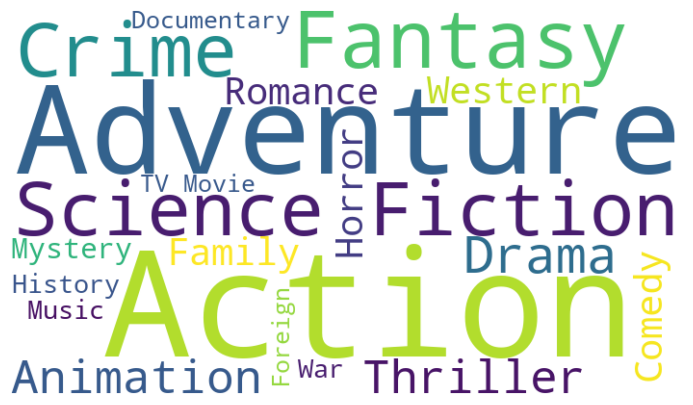

In [146]:
genres_string = GFF_df['Genres']

# Generate word frequencies using Counter
word_freq = Counter(genres_string)
print(word_freq)
# Create a WordCloud object
wordcloud = WordCloud(width=700, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the WordCloud
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Q7: Use scatter plot to draw the relationship between budget and revenue.
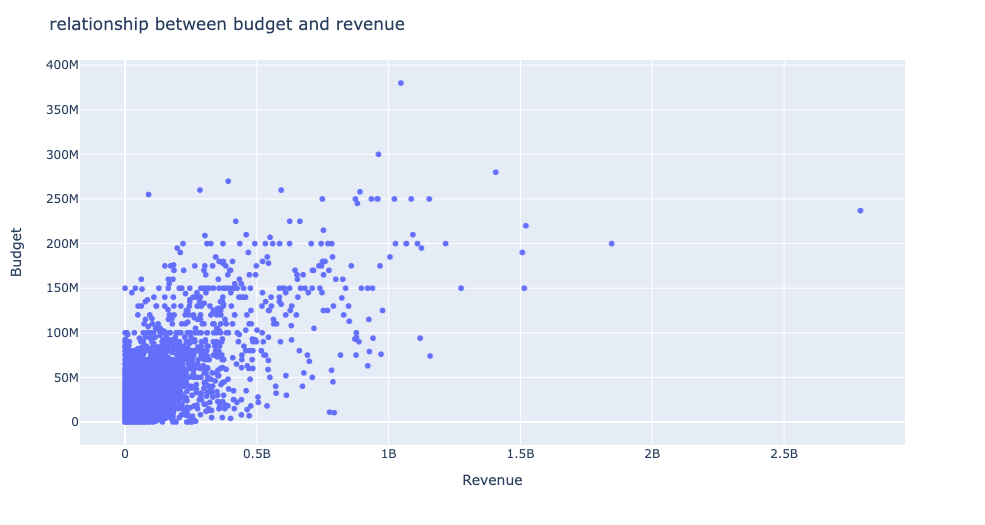

In [205]:
px.scatter(combined_df, x='revenue', y='budget', title='relationship between budget and revenue')


## Q8: Use line chart to draw the relationship between revenue and popularity.
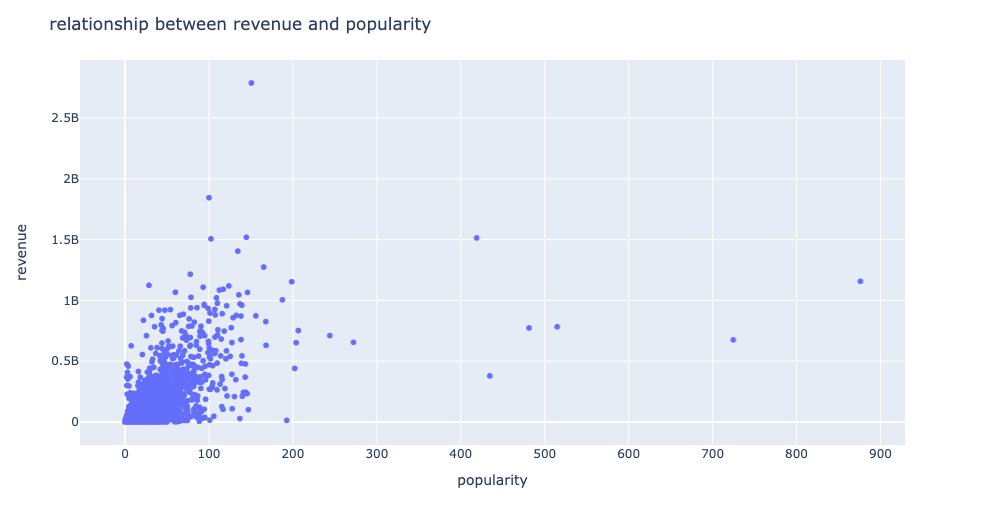

In [206]:
px.scatter(combined_df, x='popularity', y='revenue', title='relationship between revenue and popularity')
